In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data pr ocessing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-whitegrid")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
data = pd.read_csv('C:/data/subwaytime.csv', encoding = 'CP949')
data.head()

,호선명,지하철역,04:00:00~04:59:59,Unnamed: 3,05:00:00~05:59:59,Unnamed: 5,06:00:00~06:59:59,Unnamed: 7,07:00:00~07:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 41,00:00:00~00:59:59,Unnamed: 43,01:00:00~01:59:59,Unnamed: 45,02:00:00~02:59:59,Unnamed: 47,03:00:00~03:59:59,Unnamed: 49
0,NaN,NaN,승차,하차,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,1호선,서울역,746,16,9151,6038,11560,33958,36079,87958,...,10028,7638,13,570,0,0,0,0,0,0
2,1호선,동묘앞,57,3,2966,885,3409,4736,5917,9312,...,1036,2344,3,1198,0,0,0,0,0,0
3,1호선,시청,29,0,1711,3796,2774,19145,6323,61361,...,3808,1308,5,86,0,0,0,0,0,0
4,1호선,종각,137,0,2075,4407,2943,22272,5344,96690,...,6340,1341,14,133,3,2,0,0,0,0


In [4]:
def test(a):
    if ((a // 2 + 3) >= 24) & (a % 2 == 0):
        return str(a // 2 - 21) + "시승차"
    elif ((a // 2) + 3 >= 24) & (a % 2 == 1):
        return str(a // 2 - 21) + "시하차"
    elif (a % 2 == 0):
        return str(a // 2 + 3) + "시승차"
    else:
        return str(a // 2 + 3) + "시하차"
time_cols = [test(x) for x in range(2, 50)]
time_cols

['4시승차',
 '4시하차',
 '5시승차',
 '5시하차',
 '6시승차',
 '6시하차',
 '7시승차',
 '7시하차',
 '8시승차',
 '8시하차',
 '9시승차',
 '9시하차',
 '10시승차',
 '10시하차',
 '11시승차',
 '11시하차',
 '12시승차',
 '12시하차',
 '13시승차',
 '13시하차',
 '14시승차',
 '14시하차',
 '15시승차',
 '15시하차',
 '16시승차',
 '16시하차',
 '17시승차',
 '17시하차',
 '18시승차',
 '18시하차',
 '19시승차',
 '19시하차',
 '20시승차',
 '20시하차',
 '21시승차',
 '21시하차',
 '22시승차',
 '22시하차',
 '23시승차',
 '23시하차',
 '0시승차',
 '0시하차',
 '1시승차',
 '1시하차',
 '2시승차',
 '2시하차',
 '3시승차',
 '3시하차']

In [5]:
transfer = data.iloc[0]
info = data.drop([0, 609])
info.iloc[:, 2:] = info.iloc[:, 2:].astype(int)
info.columns = ["호선명", "지하철역"] + time_cols
transfer_time = info.iloc[:, 8:14]
transfer_time['출근길 유동인구'] = transfer_time.sum(axis = 1)
Topranklist = transfer_time.sort_values(by = '출근길 유동인구', ascending = False).head().index.tolist()
info.loc[[Toprank for Toprank in Topranklist]]

<ipython-input-5-576b0be45304>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfer_time['출근길 유동인구'] = transfer_time.sum(axis = 1)


,호선명,지하철역,4시승차,4시하차,5시승차,5시하차,6시승차,6시하차,7시승차,7시하차,...,23시승차,23시하차,0시승차,0시하차,1시승차,1시하차,2시승차,2시하차,3시승차,3시하차
42,2호선,구로디지털단지,172,6,39043,5617,52721,21441,134488,86206,...,7416,34189,0,78,0,0,0,0,0,0
32,2호선,강남,85,6,5464,10853,15861,49435,36772,151261,...,24062,12861,7,4,0,0,0,0,0,0
40,2호선,신림,244,17,38964,3517,74981,19195,200062,34271,...,9630,58998,6,147,0,0,0,0,0,0
513,7호선,가산디지털단지,614,6,7546,5884,8909,24805,21503,121712,...,6865,5450,41,452,0,0,0,0,0,0
31,2호선,역삼,38,2,3075,7003,7618,43544,13696,128541,...,10106,6425,0,1,0,0,0,0,0,0


In [6]:
subway = input("호선명을 입력하세요 : ")
subway_data = info[info['호선명'] == subway]
subway_data['출퇴근길 유동인구'] = subway_data.iloc[:, 8:14].sum(axis = 1) + subway_data.iloc[:, 28:34].sum(axis = 1)
subway_data = subway_data.sort_values(by = '출퇴근길 유동인구', ascending = False)
subway_data.head()['지하철역']

호선명을 입력하세요 : 2호선


<ipython-input-6-cd29f628ebb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_data['출퇴근길 유동인구'] = subway_data.iloc[:, 8:14].sum(axis = 1) + subway_data.iloc[:, 28:34].sum(axis = 1)


32          강남
42     구로디지털단지
26    잠실(송파구청)
40          신림
31          역삼
Name: 지하철역, dtype: object

<ipython-input-63-bd6eb67c8eff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info2['최소시간대'] = 0
<ipython-input-63-bd6eb67c8eff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info2['최고시간대'] = 0
C:\Users\revol\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

<AxesSubplot:xlabel='최고시간대', ylabel='count'>

C:\Users\revol\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\revol\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\revol\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\revol\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\revol\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\revol\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52572 missing from c

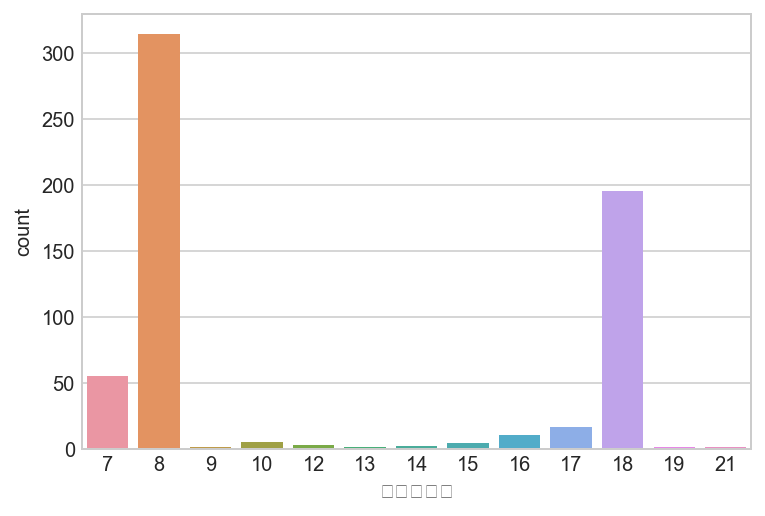

In [63]:
info2 = info.iloc[:, 6:38]
info2['최소시간대'] = 0
info2['최고시간대'] = 0
for i in range(0, 608):
    population_list = []
    for j in range(0, 32, 2):
        population_list.append(info2.iloc[i, j] + info2.iloc[i, j+1])
    info2.iloc[i, 32] = population_list.index(min(population_list)) + 6
    info2.iloc[i, 33] = population_list.index(max(population_list)) + 6
info2['최소시간대'].value_counts().sort_index()
#sns.countplot(data = info2['최소시간대'], x = info2['최소시간대'].index)
sns.countplot(data = info2['최고시간대'], x = info2['최고시간대'].index)